# 01 Pressinõukogule esitatud kaebused 2002-2021 17.03.2022

In [1]:
from estnltk import Text
from matplotlib import pyplot as plt
import pandas as pd
import re

In [2]:
kaebused = pd.read_csv('toofailid/kaebused_2002_2021.csv')

In [3]:
kaebused.shape

(1081, 6)

In [4]:
# Tabeli veerg väiksetäheliseks listiks
def Veerg_listiks(data,veerg):
    veerg_list = data[veerg].to_list()
    veerg_list1 = [rida.lower() for rida in veerg_list]
    return veerg_list1

## 1.1 Kaebuse esitamise kuupäeva ja aasta eraldamine (tunnusest Kaebaja)

In [5]:
# Kaebuse esitamise kuupäeva eraldamine
# Kuupäevast aasta eraldamine
kaebuse_kuupaevad = []
kaebuse_aastad = []
for kaebaja in Veerg_listiks(kaebused, 'Kaebaja'):
    match = re.search(r'\d{2}\.\d{2}\.\d{2}', kaebaja) #kuupäev formaadis 24.02.22
    if match:
        kaebuse_kuupaev = match[0][0:8]
        aasta = '20' + match[0][6:8] #aasta formaat 2022
    kaebuse_kuupaevad.append(kaebuse_kuupaev)
    kaebuse_aastad.append(aasta)

# Tabelisse vastavate veergude lisamine
kaebused.insert(2,'Kaebuse kuupäev', kaebuse_kuupaevad)
kaebused.insert(3,'Kaebuse aasta', kaebuse_aastad)

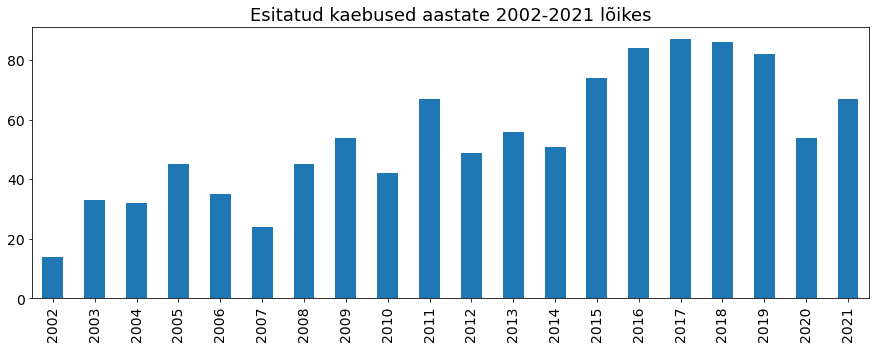

In [6]:
# Esitatud kaebused aastate lõikes, salvestatud failidesse
sagedused1 = kaebused['Kaebuse aasta'].value_counts().sort_index()
tabel1 = pd.DataFrame({'Kaebuse esitamise aasta':sagedused1.index, 'Kaebuste arv aastas':sagedused1.values})
tabel1.to_excel("01tabelid/tabel1_Esitatud_kaebused_aastate_lõikes_2002_2021.xlsx")
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Esitatud kaebused aastate 2002-2021 lõikes", size=18)
sagedused1.plot(ax=ax, kind='bar', fontsize=14)
plt.savefig("01joonised/joonis1_Esitatud_kaebused_aastate_lõikes_2002_2021.png")
plt.show()

In [7]:
tabel1

,Kaebuse esitamise aasta,Kaebuste arv aastas
0,2002,14
1,2003,33
2,2004,32
3,2005,45
4,2006,35
5,2007,24
6,2008,45
7,2009,54
8,2010,42
9,2011,67


## 1.2 Lahendi kuupäeva ja lahendi tulemuse eraldamine (tunnusest Lahend) 

In [8]:
# Lahendi kuupäeva ja lahendi tulemuse eraldamine.
lahendi_kuupaevad = []
lahendi_tulemused = []
for lahend in Veerg_listiks(kaebused, 'Lahend'):
    match = re.search(r'\d{2}\.\d{2}\.\d{2,}', lahend) #kuupäev formaadis 24.02.22 või 24.02.2022
    if match:
        lahendi_kuupaev = match[0][0:10]
    lahend_tulemus = re.sub('[0-9.]+', '', lahend).strip(' ') #eristatakse lahend
    lahendi_kuupaevad.append(lahendi_kuupaev) 
    lahendi_tulemused.append(lahend_tulemus)
# Andmestikku vastavate veergude lisamine
kaebused.insert(7,'Lahendi kuupäev', lahendi_kuupaevad)

In [9]:
lahendi_tulemused1 = []
lahendi_tulemused2 = []
for tulemus in lahendi_tulemused:
    if 'pressinõukogu'in tulemus or 'otsus' in tulemus:
        lahendi_tulemused1.append('pressinõukogu otsus')
        lahendi_tulemused2.append('pressinõukogu otsus')
        
    else:
        lahendi_tulemused1.append('otsust ei tehtud')
        lahendi_tulemused2.append(tulemus)
kaebused.insert(7,'Lahendi tulemus1', lahendi_tulemused1)
kaebused.insert(8,'Lahendi tulemus2', lahendi_tulemused2)

In [10]:
# Ebavajalike veergude eemaldamine
del kaebused['Kaebaja']
del kaebused['Lahend']

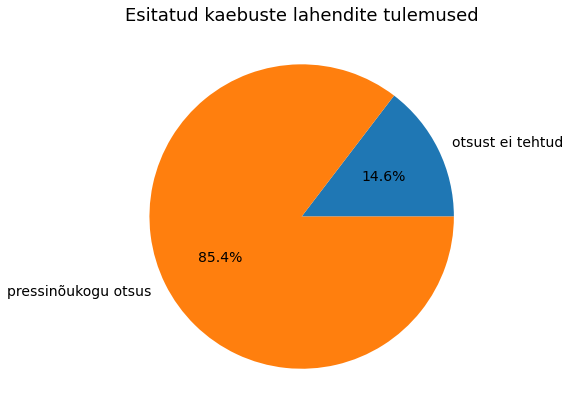

In [12]:
# Lahendid tulemuste lõikes, salvestatud faili
sagedused2 = kaebused['Lahendi tulemus2'].value_counts()
tabel2 = pd.DataFrame({'Lahendi tulemus':sagedused2.index, 'Lahendite arv':sagedused2.values})
tabel2.to_excel("01tabelid/tabel2_Esitatud_kaebuste_lahendite_tulemused.xlsx")
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("Esitatud kaebuste lahendite tulemused", size=18)
kaebused['Lahendi tulemus1'].value_counts().sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%', radius =1)
plt.ylabel("")
plt.savefig("01joonised/joonis2_Esitatud_kaebuste_lahendite_tulemused.png")
plt.show()

In [13]:
tabel2

,Lahendi tulemus,Lahendite arv
0,pressinõukogu otsus,923
1,tagasi lükatud,59
2,tagasi võetud,20
3,kokkulepe,18
4,poolte kokkulepe,13
5,menetlus lõpetatud,13
6,lahendatud,12
7,lahendita,10
8,kokkulepe eelmenetluse käigus,8
9,jäetud läbi vaatamata,2


In [14]:
kaebused.shape

(1081, 9)

## 1.3 Väljaande nime eraldamine ja väljaande liigi määramine (tunnusest Väljaanne) 

In [15]:
tr = 'kirjutav meedia'
te = 'rääkiv meedia'
def Valjaanne (k):

    if 'Delfi' in k:
        t = ('Delfi', tr)
    elif 'Pärnu Postimees' in k:
        t = ('Pärnu Postimees', tr)
    elif 'Postimees' in k or 'Postimehe' in k or 'postimees.ee' in k:
        t = ('Postimees', tr)
    elif 'Lõuna-Eesti Postimees' in k:
        t = ('Lõuna-Eesti Postimees', tr)
    elif 'Lääne-Harju Ekspress' in k:
        t = ('Lääne-Harju Ekspress', tr)
    elif 'Eesti Ekspress' in k or ('Eesti' in k and 'Ekspress' in k):
        t = ('Eesti Ekspress', tr)  
    elif 'Eesti Päevaleht' in k or 'Eesti Päevalehe'in k or 'Eesti Päevalehe LP' in k or 'LP' in k or ('Eesti' in k and 'Päevaleht' in k):
        t = ('Eesti Päevaleht', tr)  
    elif 'Õhtuleht' in k:
        t = ('Õhtuleht', tr)
    elif 'Maaleht' in k:
        t = ('Maaleht', tr)
    elif 'Õpetajate Leht' in k or ('Õpetajate' in k and 'Leht' in k):
        t = ('Õpetajate Leht', tr)
    elif 'Äripäev' in k:
        t = ('Äripäev', tr)
    elif 'Hiiu Leht' in k  or ('Hiiu' in k and 'Leht' in k):
        t = ('Hiiu Leht', tr)
    elif 'Oma Saar' in k  or ('Oma' in k and 'Saar' in k):
        t = ('Oma Saar', tr)
    elif 'Elva Postipoiss' in k  or ('Elva' in k and 'Postipoiss' in k):
        t = ('Elva Postipoiss', tr)
    elif 'Põhjarannik' in k:
        t = ('Põhjarannik', tr)
    elif 'Virumaa Nädalaleht' in k: #1994-2016
        t = ('Virumaa Nädalaleht', tr)
    elif 'Harjumaa' in k: #ilmus 1992-2008
        t = ('Harjumaa', tr)
    elif 'Vooremaa' in k:
        t = ('Vooremaa', tr)
    elif 'Vali Uudised' in k: #alates 24.09.2019 uus nimi Vooremaa
        t = ('Vali Uudised', tr)
    elif 'Sakala' in k:
        t = ('Sakala', tr)
    elif 'Valgamaalane' in k:
        t = ('Valgamaalane', tr)
    elif 'Koit' in k:
        t = ('Koit', tr)
    elif 'Kroonika' in k:
        t = ('Kroonika', tr)
    elif 'Saldo' in k: #ilmus 2003-2012
        t = ('Saldo', tr)
    elif 'Lõuna Leht' in k or 'LõunaLeht' in k:
        t = ('LõunaLeht', tr)
    elif 'Pealinn' in k:
        t = ('Pealinn', tr)
    elif 'Pirita' in k:
        t = ('Pirita', tr)
    elif 'Sirp' in k:
        t = ('Sirp', tr)
    elif 'Müürileht' in k:
        t = ('Müürileht', tr)
    elif 'Paldiski Linnaleht' in k:
        t = ('Paldiski Linnaleht', tr)
    elif 'Tartu Linnaleht' in k:
        t = ('Tartu Linnaleht', tr)
    elif 'Nelli Teataja' in k:
        t = ('Nelli Teataja', tr)
    elif 'Kose Teataja' in k:
        t = ('Kose Teataja', tr)
    elif 'Linnaleht' in k:
        t = ('Linnaleht', tr)
    elif 'Sõnumitooja' in k: #1994-
        t = ('Sõnumitooja', tr)
    elif 'Naisteleht' in k: #2006-
        t = ('Naisteleht', tr)
    elif 'Videvik' in k: #ilmus1990-2013
        t = ('Videvik', tr)
    elif 'Kesknädal' in k: #ilmus 1992-2008
        t = ('Kesknädal', tr)
    elif 'BNS' in k:
        t = ('BNS', tr)
    elif 'Meditsiiniuudised' in k:
        t = ('Meditsiiniuudised', tr)
    elif 'Eesti Kirik' in k  or ('Eesti' in k and 'Kirik' in k):
        t = ('Eesti Kirik', tr)
    elif 'Puutepunktid' in k:
        t = ('Puutepunktid', tr)
    elif 'Gorod' in k:
        t = ('Gorod', tr)
    elif 'Stolitsa' in k:
        t = ('Stolitsa', tr)
    elif 'Den za Dnjom' in k:
        t = ('Den za Dnjom', tr)
    elif 'MK-Estonia' in k:
        t = ('MK-Estonia', tr)
    elif 'Sõnumitooja' in k:
        t = ('Sõnumitooja', tr)
    elif 'Molodjoz Estonii' in k or ('Molodjoz' in k and 'Estonii' in k) or 'Molodjož Estonii' in k:
        t = ('Molodjoz Estonii', tr)
    elif 'Vesti Nedeli' in k or ('Vesti' in k and 'Nedeli' in k):
        t = ('Vesti Nedeli', tr)
    elif 'Sillamäeskii Vestnik' in k or ('Sillamäeskii' in k and 'Vestnik' in k) or 'Sillamjaeskii Vestnik' in k :
        t = ('Sillamäeskii Vestnik', tr)
    elif 'Vesti Dnja' in k or ('Vesti' in k and 'Dnja' in k):
        t = ('Vesti Dnja', tr)
    elif 'Vesti' in k:
        t = ('Vesti', tr)
    elif 'Narvskaja Gazeta' in k or ('Narvskaja' in k and 'Gazeta' in k):
        t = ('Narvskaja Gazeta', tr)
    elif 'Viru Prospekt' in k: #ilmus 1999-2021
        t = ('Viru Prospekt', tr)
    elif 'Krengolmski Prospekt' in k: #ilmus 1999-2007, seejärel nime all Viru Prospekt
        t = ('Krengolmski Prospekt', tr)
    elif 'Delovõje Vedomosti' in k or ('Delovõje' in k and 'Vedomosti' in k):
        t = ('Delovõje Vedomosti', tr)
    elif 'Estonija' in k:
        t = ('Estonija', tr)
    elif 'Panoraam' in k:
        t = ('Panoraam', tr)
    elif 'Pere&Kodu' in k:
        t = ('Pere&Kodu', tr)
    elif 'Just!' in k:
        t = ('Just!', tr)
    elif 'Kultuur ja Elu' in k: #1958-
        t = ('Kultuur ja Elu', tr)
    elif 'Harju Elu' in k or ('Harju' in k and 'Elu' in k):
        t = ('Harju Elu', tr)  
    elif 'Lääne Elu' in k or ('Lääne' in k and 'Elu' in k):
        t = ('Lääne Elu', tr) 
    elif 'Meie Maa' in k or ('Meie' in k and 'Maa' in k):
        t = ('Meie Maa', tr) 
    elif 'Saarte Hääl' in k or ('Saarte' in k and 'Hääl' in k):
        t = ('Saarte Hääl', tr) 
    elif 'Raplamaa Sõnumid' in k or ('Raplamaa' in k and 'Sõnumid' in k):
        t = ('Raplamaa Sõnumid', tr) 
    elif 'Nädaline' in k: #ilmus 2007-2012
        t = ('Nädaline', tr)
    elif 'Järva Teataja' in k or ('Järva' in k and 'Teataja' in k):
        t = ('Järva Teataja', tr) 
    elif 'Virumaa Teataja' in k or ('Virumaa' in k and 'Teataja' in k):
        t = ('Virumaa Teataja', tr) 
    elif 'Võrumaa Teataja' in k or ('Võrumaa' in k and 'Teataja' in k):
        t = ('Võrumaa Teataja', tr) 
    elif 'ERR uudised' in k or 'ERRi portaal' in k or 'ERR uudisteportaal' in k or 'ERRi veeb' in k:
        t = ('ERR portaal', tr)
    elif 'TV3' in k or ('TV' in k and '3' in k):
        t = ('TV3', te)
    elif 'Kanal2' in k or 'Kanal 2' in k or 'Kuuuurija' in k or ('Kanal' in k and '2' in k):
        t = ('Kanal2', te)
    elif 'ETV' in k or 'ERR' in k or 'Rahvusringhääling' in k or 'Eesti Televisioon' in k or ('Eesti' in k and 'Rahvusringhääling' in k):
        t = ('ERR', te)
    elif 'Kuku' in k or ('Kuku' in k and 'Raadio' in k):
        t = ('Kuku Raadio', te)
    elif 'Tallinna Televisioon' in k or 'Tallinna TV' in k:
        t = ('Tallinna TV', te)
    elif 'Elu24' in k:
        t = ('Elu24', tr)
    elif 'Sky.ee' in k:
        t = ('Sky.ee', tr)
    else:
        t = ('muu väljaanne', 'muu meedia')
    return t

In [16]:
# Väljaande nime (kanali) ja väljaande tüübi määramine esimesel viisil (käsitsi määratud väljaannete nimede abil)
valjaanne = kaebused['Väljaanne'].to_list()
valjaande_tyyp = [Valjaanne(k) for k in valjaanne]
Vkanal1, Vtyyp1 = map(list, zip(*valjaande_tyyp))
kaebused['Vkanal1'] = Vkanal1
kaebused['Vtyyp1'] = Vtyyp1

In [17]:
#Väljaande nime (kanali) ja väljaande tüübi määramine teisel viisil (nimeüksuste abil)
# Otsitakse tekstist nimesid

# Loome uue nimeüksuste tuvastaja 
from estnltk.taggers import NerTagger
ner_tagger = NerTagger()
# Milliseid kihte ner_tagger vajab?
ner_tagger.input_layers

nimed = []
from estnltk import Text
for k in valjaanne:
    t= Text(k).tag_layer('morph_analysis')
    # lisame nimeüksuste märgenduse
    ner_tagger.tag(t)
    # leia nimeüksuste tekstijupid
    entity_texts = [ne.enclosing_text for ne in t.ner]
    nimed.append(entity_texts)

In [18]:
valjaande_nimi = [Valjaanne(k) for k in nimed]
Vkanal2, Vtyyp2 = map(list, zip(*valjaande_nimi))
kaebused['Vkanal2'] = Vkanal2
kaebused['Vtyyp2'] = Vtyyp2
Vkanal = list(zip(Vkanal1, Vkanal2))
Vtyyp = list(zip(Vtyyp1, Vtyyp2))

In [19]:
Vnimi = []
for v in Vkanal:
    if v[1] != 'muu väljaanne':
        Vnimi.append(v[1])
    else:
        Vnimi.append(v[0])
Vliik = []
for v in Vtyyp:
    if v[1] != 'muu meedia':
        Vliik.append(v[1])
    else:
        Vliik.append(v[0])
kaebused['Väljaande nimi'] = Vnimi
kaebused['Väljaande liik'] = Vliik

In [111]:
jaotus3 = kaebused['Väljaande nimi'].value_counts(ascending = False)
tabel3 = pd.DataFrame({'Väljaande nimi':jaotus3.index, 'Kaebusi':jaotus3.values})
tabel3['Osakaal, %'] = round((tabel3['Kaebusi'] / 
                      tabel3['Kaebusi'].sum() )* 100, 1)
tabel3.to_excel("01tabelid/tabel3_Väljaanded.xlsx") 

#fig, ax = plt.subplots(figsize=(10, 5))
#plt.title("Väljaanded õigeksmõistvates ja taunivates otsustes", size=18)
#tabel9.plot(ax=ax, kind = 'bar', x = 'Väljaande nimi', y = 'Väljaande liik')
#plt.savefig("01joonised/joonis9_Väljaande_nimi_väljaande_liik_oigeks_tauniv.png")
#plt.show()

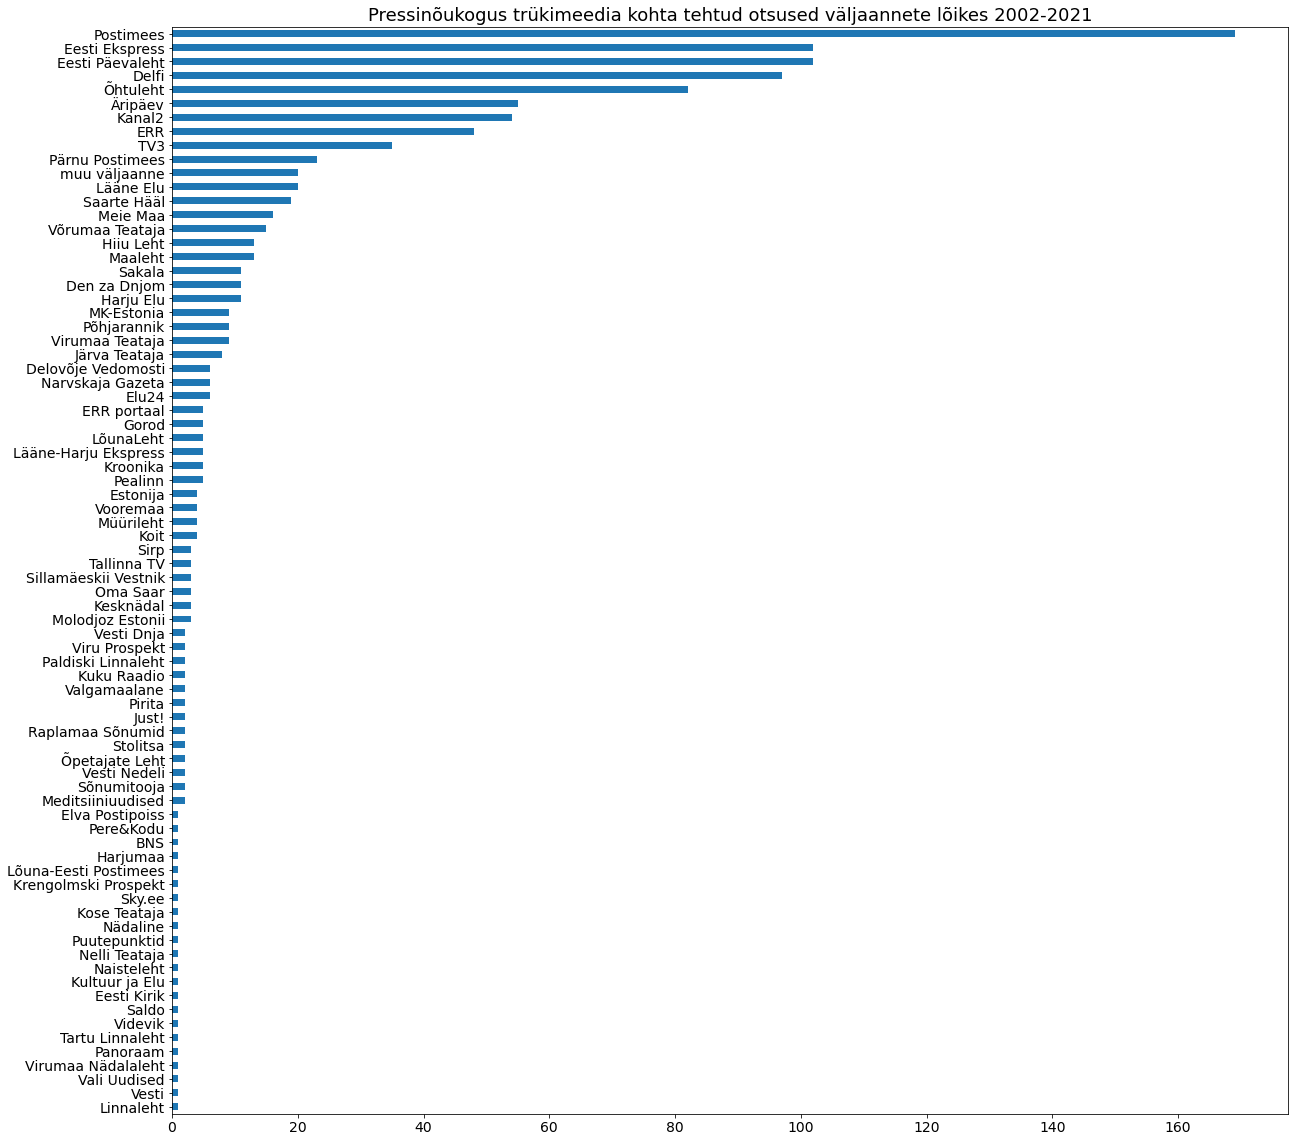

In [113]:
fig, ax = plt.subplots(figsize=(20,20))
plt.title("Pressinõukogus trükimeedia kohta tehtud otsused väljaannete lõikes 2002-2021", size=18)
kaebused['Väljaande nimi'].value_counts(ascending = True).plot(ax=ax, kind='barh', fontsize=14)
plt.savefig("01joonised/joonis3_Väljaanded.png")
plt.show()

In [112]:
tabel3

,Väljaande nimi,Kaebusi,"Osakaal, %"
0,Postimees,169,15.6
1,Eesti Ekspress,102,9.4
2,Eesti Päevaleht,102,9.4
3,Delfi,97,9.0
4,Õhtuleht,82,7.6
...,...,...,...
73,Panoraam,1,0.1
74,Virumaa Nädalaleht,1,0.1
75,Vali Uudised,1,0.1
76,Vesti,1,0.1


In [22]:
del kaebused['Vkanal1']
del kaebused['Vtyyp1']
del kaebused['Vkanal2']
del kaebused['Vtyyp2']

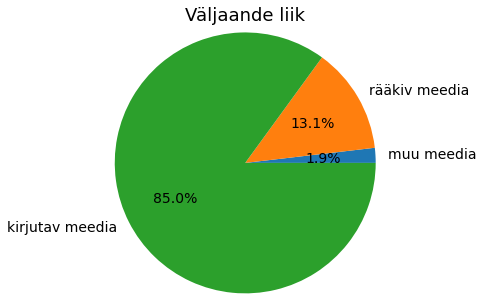

In [23]:
sagedused3_1 = kaebused['Väljaande liik'].value_counts()
tabel3_1 = pd.DataFrame({'Väljaande liik':sagedused3_1.index, 'Väljaannete arv':sagedused3_1.values})
tabel3_1.to_excel("01tabelid/tabel3_1_Väljaande_liik_kõik.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Väljaande liik", size=18)
sagedused3_1.sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%', radius = 1.2)
plt.ylabel("")
plt.savefig("01joonised/joonis3_1_Väljaande_liik_kõik.png")
plt.show()

In [24]:
tabel3_1

,Väljaande liik,Väljaannete arv
0,kirjutav meedia,919
1,rääkiv meedia,142
2,muu meedia,20


## 1.4 Eesti ajakirjanduseetika koodeksipunktide eristamine tekstist

### https://meedialiit.ee/eetikakoodeks/

In [28]:
# Tabeli veerust Otsuse sisu eraldatakse koodeksipunktid
koodeks = [re.findall(r'[1-6]\.[0-9]+', otsus) for otsus in Veerg_listiks(kaebused,'Otsuse sisu')]

# Tabelisse lisatud veerg koodeksipunktidega
kaebused['Koodeks'] = koodeks

# Eesti ajakirjanduseetika koodeksi punktid
koodeksipunktid = ['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', 
                   '2.1', '2.2', '2.3', '2.4', 
                   '3.1','3.2', '3.3', '3.4', '3.5', '3.6','3.7',
                   '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10', '4.11', '4.12',
                   '5.1', '5.2', '5.3',
                   '6.1', '6.2', '6.3', '6.4']

In [29]:
# Väljastab listi: elemendi leidumise korral 1, muidu 0
def Kodeerija(k, kd_list):
    list_k = []
    for v in kd_list:
        if k in v:
            list_k.append(1)
        else:
            list_k.append(0)
    return list_k

In [30]:
# Tabelisse koodeksipunkti veeru lisamine
koodeks_kasutamata = []
koodeks_kasutatud = []
for punkt in koodeksipunktid:
    k = Kodeerija(punkt, koodeks)
    Sum = sum(k) #kui 0, siis pole seda koodeksipunkti kasutatud
    if Sum == 0:
        koodeks_kasutamata.append(punkt)
    else:
        koodeks_kasutatud.append(punkt)
        kaebused[punkt] = k

In [31]:
# Kasutatud koodeksipunktide arv
len(koodeks_kasutatud)

26

In [32]:
# Koodeksipunktide mainimine ühes kaebuses
kaebused['Koodeksipunkte'] = kaebused[koodeks_kasutatud].sum(axis=1)

In [33]:
# Kõik  kokku
kaebused['Koodeksipunkte'].sum()

535

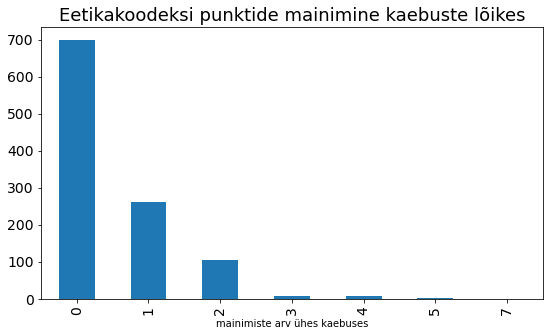

In [40]:
sagedused4= kaebused['Koodeksipunkte'].value_counts().sort_values(ascending=False)
tabel4 = pd.DataFrame({'Koodeksipunkte ühes kaebuses':sagedused4.index, 'Kaebuste arv':sagedused4.values})
tabel4.to_excel("01tabelid/tabel4_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes.xlsx")
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Eetikakoodeksi punktide mainimine kaebuste lõikes", size=18)
sagedused4.plot(ax = ax, xlabel = 'mainimiste arv ühes kaebuses', kind='bar', fontsize=14)
plt.savefig("01joonised/joonis4_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes.png")
plt.show()

In [41]:
tabel4

,Koodeksipunkte ühes kaebuses,Kaebuste arv
0,0,699
1,1,261
2,2,104
3,3,7
4,4,7
5,5,2
6,7,1


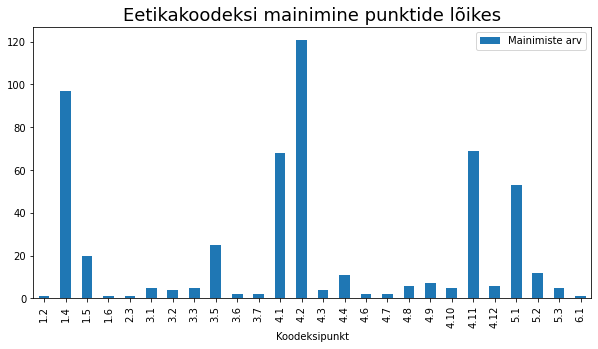

In [44]:
# Koodeksipunktide mainimised
list_kokku = []
tabel5 = pd.DataFrame()
for i in koodeks_kasutatud:
    Total = kaebused[i].sum()
    list_kokku.append(Total)
tabel5['Koodeksipunkt'] = koodeks_kasutatud
tabel5['Mainimiste arv'] = list_kokku
tabel5.to_excel("01tabelid/tabel5_Eetikakoodeksi_mainimine_punktide_lõikes.xlsx") 
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi mainimine punktide lõikes", size=18)
tabel5.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Mainimiste arv')
plt.savefig("01joonised/joonis5_Eetikakoodeksi_mainimine_punktide_lõikes.png")
plt.show()

In [45]:
# Mainimisi kokku
tabel5['Mainimiste arv'].sum()

535

In [46]:
tabel5

,Koodeksipunkt,Mainimiste arv
0,1.2,1
1,1.4,97
2,1.5,20
3,1.6,1
4,2.3,1
5,3.1,5
6,3.2,4
7,3.3,5
8,3.5,25
9,3.6,2


## 1.5 Otsuse liigi eraldamine (tunnusest Otsuse sisu)

In [64]:
tulemus_list = []
for sonad in Veerg_listiks(kaebused,'Otsuse sisu'):
    #sonad = sonad.lower()
    if 'õigeksmõistev' in sonad and 'tauniv'  in sonad:
        tulemus_list.append('topeltlahend')        
    elif 'õigeksmõistev' in sonad:
        tulemus_list.append('õigeksmõistev')        
    elif 'tauniv' in sonad:
        tulemus_list.append('tauniv')
    else: 
        tulemus_list.append('muu lahend')

In [67]:
kaebused.insert(9,'Otsuse liik', tulemus_list)

In [68]:
kaebused

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Otsuse liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,...,0,0,0,0,0,1,0,0,0,2
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,5,12.11.02,2002,"KesKus, Koit ""Kaos arhitektuuri- pärandis"", ""Soss-seplus Eesti ilusaima mõisahoonega""","Kaebaja väitel on artiklites Ahja mõisa puudutavas osas faktivead ja põhjendamatu laim. Maakonnalehes ""Koit"" avaldamine tekitas kaebaja väitel Ahja valla elanikes põhjendamatuid kannatusi ja solvas pa

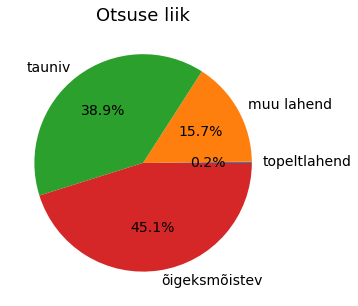

In [76]:
# Lahendid tulemuste lõikes, salvestatud faili
sagedused6 = kaebused['Otsuse liik'].value_counts()
tabel6 = pd.DataFrame({'Otsuse liik':sagedused6.index, 'Otsuste arv':sagedused6.values})
tabel6.to_excel("01tabelid/tabel6_Otsuse_liik.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Otsuse liik", size=18)
sagedused6.sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%')
plt.ylabel("")
plt.savefig("01joonised/joonis6_Otsuse_liik.png")
plt.show()

In [73]:
tabel6

,Otsuse liik,Otsuste arv
0,õigeksmõistev,488
1,tauniv,421
2,muu lahend,170
3,topeltlahend,2


## Sõnapilved

In [118]:
#https://et.wikipedia.org/wiki/Sides%C3%B5na
#https://www.taskutark.ee/m/asesonad/
#sidesõnad
stopsõnad = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'artikkel', 'kaebaja', 'pressinõukogu',
            'õigeksmõistev', 'tauniv']
#sidesõnad ja asesõnad
stopsõnad_uus = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

In [119]:
# Kaebuses nimisõnade ja omadussõnade kasutamine
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text

nimi_omadus_sonad = []
for i in tqdm(range (0, len(data))):
    rida = kaebused.iloc[i]
    tekst = Text(rida[4]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words = ' '.join(map(str, nimi_omadus_sonad))

100%|████████████████████████████████████████████████████████████████████████████████| 909/909 [00:10<00:00, 84.76it/s]


Nimisõnu ja omadussõnu sõnapilves:  7663


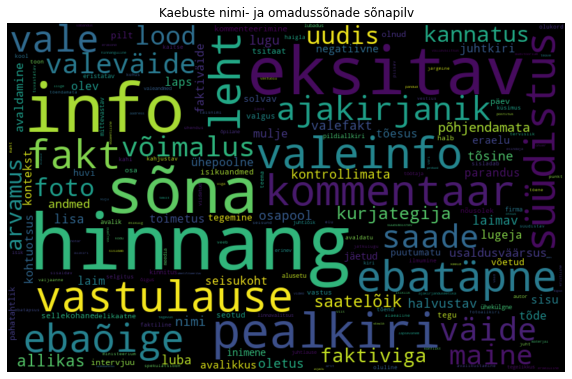

In [120]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title("Kaebuste nimi- ja omadussõnade sõnapilv")
plt.savefig('01joonised/joonis_Kaebuste_nimi_omadus_sõnapilv.png')
plt.axis("off")
print("Nimisõnu ja omadussõnu sõnapilves: ", len(nimi_omadus_sonad))

In [121]:
# Otsuses nimisõnade ja omadussõnade kasutamine
from tqdm import tqdm
from wordcloud import WordCloud
from estnltk import Text

nimi_omadus_sonad = []
for i in tqdm(range (0, len(data))):
    rida = kaebused.iloc[i]
    tekst = Text(rida[8]).tag_layer().morph_analysis['lemma','partofspeech']
    for sona in tekst:
        if sona[0][1] == 'S' or sona[0][1] == 'A' or sona[0][1] == 'C' or sona[0][1] == 'U':
            nimi_omadus_sonad.append(sona[0][0])

nimi_omadus_words_otsuse_sisu = ' '.join(map(str, nimi_omadus_sonad))

100%|████████████████████████████████████████████████████████████████████████████████| 909/909 [00:23<00:00, 38.71it/s]


Nimisõnu ja omadussõnu sõnapilves:  16020


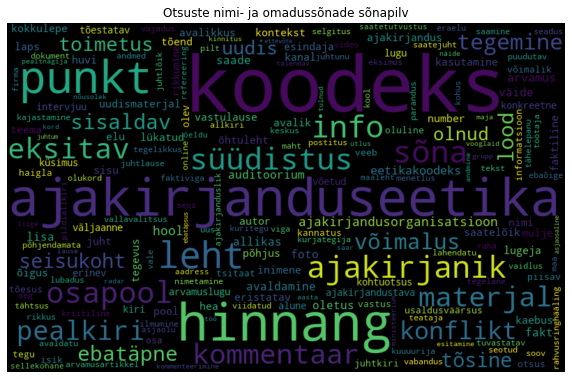

In [122]:
wordcloud_nimi_omadus = WordCloud(stopwords = stopsõnad, width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(nimi_omadus_words_otsuse_sisu)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_nimi_omadus, interpolation='bilinear')
plt.title("Otsuste nimi- ja omadussõnade sõnapilv")
plt.savefig('01joonised/joonis_Otsuste_nimi_omadus_sõnapilv.png')
plt.axis("off")
print("Nimisõnu ja omadussõnu sõnapilves: ", len(nimi_omadus_sonad))

In [101]:
kaebused.to_csv('toofailid/kaebused_töödeldud.csv',index=False)
read_file = pd.read_csv (r'toofailid/kaebused_töödeldud.csv')
read_file.to_excel (r'toofailid/kaebused_töödeldud.xlsx', index = None, header=True)

## 1.6 Õigeksmõistvad ja taunivad otsused
### Andmestik Kaebused1

In [78]:
data = kaebused[(kaebused['Otsuse liik']=='õigeksmõistev') |(kaebused['Otsuse liik']=='tauniv')]

In [79]:
data

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Otsuse liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,...,0,0,0,0,0,1,0,0,0,2
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6,04.12.02,2002,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale. Kaebaja pole rahul ka tema vastuväidete avaldamata jätmisega.",pressinõukogu 

In [80]:
data.shape

(909, 41)

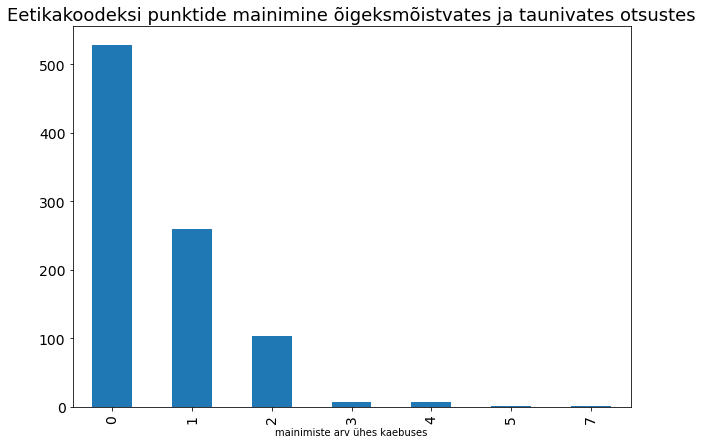

In [81]:
sagedused7 = data['Koodeksipunkte'].value_counts().sort_values(ascending=False)
tabel7 = pd.DataFrame({'Koodeksipunkte ühes kaebuses':sagedused7.index, 'Kaebuste arv':sagedused7.values})
tabel7.to_excel("01tabelid/tabel7_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("Eetikakoodeksi punktide mainimine õigeksmõistvates ja taunivates otsustes", size=18)
#autopct='%1.1f%%'
sagedused7.plot(ax = ax, xlabel = 'mainimiste arv ühes kaebuses', kind='bar', fontsize=14)
plt.savefig("01joonised/joonis7_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes_oigeks_tauniv.png")
plt.show()

In [82]:
tabel7

,Koodeksipunkte ühes kaebuses,Kaebuste arv
0,0,529
1,1,259
2,2,104
3,3,7
4,4,7
5,5,2
6,7,1


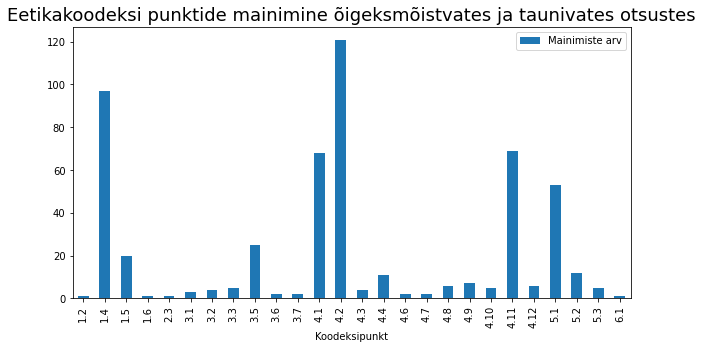

In [83]:
# Koodeksipunktide mainimised
list_kokku = []
tabel8 = pd.DataFrame()
for i in koodeks_kasutatud:
    Total = data[i].sum()
    list_kokku.append(Total)
tabel8['Koodeksipunkt'] = koodeks_kasutatud
tabel8['Mainimiste arv'] = list_kokku
tabel8['Osakaal, %'] = round((tabel8['Mainimiste arv'] / 
                      tabel8['Mainimiste arv'].sum() )* 100, 1)
tabel8.to_excel("01tabelid/tabel8_Eetikakoodeksi_mainimine_punktide_lõikes_oigeks_tauniv.xlsx") 
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi punktide mainimine õigeksmõistvates ja taunivates otsustes", size=18)
tabel8.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Mainimiste arv')
plt.savefig("01joonised/joonis8_Eetikakoodeksi_mainimine_punktide_lõikes_oigeks_tauniv.png")
plt.show()

In [84]:
#Otsuse saanud kaebustes mainitud koodeksipunktid kokku
tabel8['Mainimiste arv'].sum()

533

In [85]:
tabel8

,Koodeksipunkt,Mainimiste arv,"Osakaal, %"
0,1.2,1,0.2
1,1.4,97,18.2
2,1.5,20,3.8
3,1.6,1,0.2
4,2.3,1,0.2
5,3.1,3,0.6
6,3.2,4,0.8
7,3.3,5,0.9
8,3.5,25,4.7
9,3.6,2,0.4


In [130]:
data

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Otsuse liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,...,0,0,0,0,0,1,0,0,0,2
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6,04.12.02,2002,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale. Kaebaja pole rahul ka tema vastuväidete avaldamata jätmisega.",pressinõukogu 

In [91]:
data_taunivad = kaebused[(kaebused['Otsuse liik']=='tauniv')]
data_oigeks = kaebused[(kaebused['Otsuse liik']=='õigeksmõistev')]

In [92]:
data_oigeks

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Otsuse liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
5,1076,11.11.21,2021,"Delfi 05.11.21 Parkett kummis, tuul puhub läbi. Ostja esitas kümnete ehitusvigade tõttu arendaja vastu kaebuse","Kaebaja leiab, et artikkel sisaldab ebatäpset ja eksitavat infot. Samuti ei ole kaebaja rahul, et talle sõna ei antud.",pressinõukogu otsus,pressinõukogu otsus,16.12.21,"ÕIGEKSMÕISTEV: Delfi ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on refereeritud tarbijavaidluste komisjoni otsust, milles on mõlema osapoole seisukohad, samas oleks võinud uudises kohe alguses rõhutada, et tegemist on komisjoni otsuse refereeringuga. Kuna artikkel ei sisalda täiendavaid kommentaare, ei olnud alust kaebajale täiendavaks sõna andmiseks ega vastulauseks.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,23,02.05.03,2003,"Postimees 22.04.03 ""Rollikonflikt Kuku raadios""","Kaebaja hinnangul on ajaleht rikkunud ajakirjanduseetika koodeksit, kuna on ilma autori nõusolekuta toimetanud vastulauset ja on sellega jätnud välja kriitika toimetuse aadressil.",pressinõukogu otsus,pressinõukogu otsus,07.08.03,"ÕIGEKSMÕISTEV: Vastulausega on õigus parandada avaldatud materjalis esinevaid faktivigu ja tsitaate ning seda sai kaebaja ka oma vastulausega teha. Pressinõukogu on arvamusel, et toimetusel on õigus vastulauset toimetada. Hinnangulisi kommentaare Postimees ei lisanud. Postimees

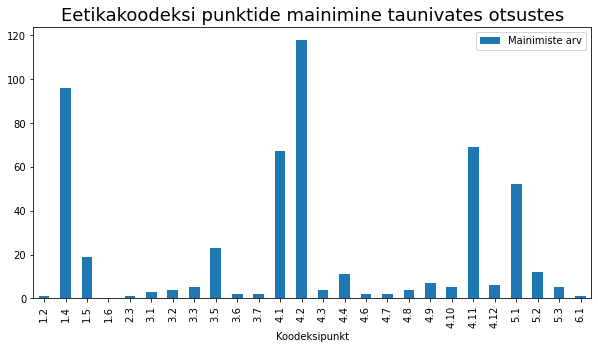

In [98]:
# Koodeksipunktide mainimised
list_kokku = []
tabel9 = pd.DataFrame()
for i in koodeks_kasutatud:
    Total = data_taunivad[i].sum()
    list_kokku.append(Total)
tabel9['Koodeksipunkt'] = koodeks_kasutatud
tabel9['Mainimiste arv'] = list_kokku
tabel9['Osakaal, %'] = round((tabel9['Mainimiste arv'] / 
                      tabel9['Mainimiste arv'].sum() )* 100, 1)
tabel9.to_excel("01tabelid/tabel9_Eetikakoodeksi_mainimine_punktide_tauniv.xlsx") 
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi punktide mainimine taunivates otsustes", size=18)
tabel9.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Mainimiste arv')
plt.savefig("01joonised/joonis9_Eetikakoodeksi_mainimine_punktide_lõikes_oigeks.png")
plt.show()

In [96]:
#Otsuse saanud kaebustes mainitud koodeksipunktid kokku
tabel9['Mainimiste arv'].sum()

521

In [90]:
tabel9

,Koodeksipunkt,Mainimiste arv,"Osakaal, %"
0,1.2,1,0.2
1,1.4,96,18.4
2,1.5,19,3.6
3,1.6,0,0.0
4,2.3,1,0.2
5,3.1,3,0.6
6,3.2,4,0.8
7,3.3,5,1.0
8,3.5,23,4.4
9,3.6,2,0.4


In [116]:
tabel10 = pd.crosstab(index=data["Väljaande nimi"], 
                            columns=data["Otsuse liik"],
                             margins=True).drop('All', axis=0)   # Include row and column totals
tabel10.columns = ["tauniv" , "õigeksmõistev" ,"kokku"]
tabel10['tauniv, %'] = round((tabel10['tauniv'] / 
                      tabel10['kokku'] )* 100, 1)
tabel10['õigeksmõistev, %'] = round((tabel10['õigeksmõistev'] / 
                      tabel10['kokku']) * 100, 1)
tabel10_1 = tabel10.sort_values(by=['kokku'], ascending=False)
tabel10_1.to_excel("01tabelid/tabel10_Pressinõukogus_tehtud_otsuste_jaotus_väljaannete_lõikes.xlsx") 

In [117]:
tabel10_1

,tauniv,õigeksmõistev,kokku,"tauniv, %","õigeksmõistev, %"
Väljaande nimi,,,,,
Postimees,63,80,143,44.1,55.9
Eesti Ekspress,39,56,95,41.1,58.9
Eesti Päevaleht,47,44,91,51.6,48.4
Delfi,49,39,88,55.7,44.3
Õhtuleht,24,45,69,34.8,65.2
...,...,...,...,...,...
Sillamäeskii Vestnik,0,1,1,0.0,100.0
Saldo,1,0,1,100.0,0.0
Nädaline,0,1,1,0.0,100.0


In [123]:
data_taunivad.to_csv('toofailid/DATA_taunivad.csv',index=False)
read_file = pd.read_csv (r'toofailid/DATA_taunivad.csv')
read_file.to_excel (r'toofailid/DATA_taunivad.xlsx', index = None, header=True)

In [124]:
data_oigeks.to_csv('toofailid/DATA_oigeks.csv',index=False)
read_file = pd.read_csv (r'toofailid/DATA_oigeks.csv')
read_file.to_excel (r'toofailid/DATA_oigeks.xlsx', index = None, header=True)

In [131]:
data.to_csv('toofailid/DATA_KOOS.csv',index=False)
read_file = pd.read_csv (r'toofailid/DATA_KOOS.csv')
read_file.to_excel (r'toofailid/DATA_KOOS.xlsx', index = None, header=True)